In [1]:
import random
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Dataset/OasisLongitudinal.csv')
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


# DATA PREPROCESSING

In [3]:
# Handle the null values by removing or replacing
data.dropna(inplace=True)
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [4]:
# Remove unwanted columns
unwanted_columns=['Hand','MRI ID','Subject ID','Visit']
data.drop(unwanted_columns,axis=1,inplace=True)
data.head()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,0,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,538,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,0,M,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [5]:
# Initialize LabelEncoders for each categorical feature
encoder_group = LabelEncoder()
encoder_mf = LabelEncoder()

In [6]:
# Encode categorical features into numeric
data['Group'] = encoder_group.fit_transform(data['Group'])
data['M/F'] = encoder_mf.fit_transform(data['M/F'])

In [7]:
# Display the encoded dataset
data.head()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,2,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,2,538,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,2,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [8]:
# Print unique values after encoding
print("Unique values in 'Group' column after encoding:", data['Group'].unique())
print("Unique values in 'M/F' column after encoding:", data['M/F'].unique())

Unique values in 'Group' column after encoding: [2 1 0]
Unique values in 'M/F' column after encoding: [1 0]


In [9]:
# Print encoded labels for 'Group'
print("Encoded labels for 'Group':")
for original_class in encoder_group.classes_:
    print(f"{original_class} -> {encoder_group.transform([original_class])[0]}")

Encoded labels for 'Group':
Converted -> 0
Demented -> 1
Nondemented -> 2


In [10]:
# Print encoded labels for 'M/F'
print("Encoded labels for 'M/F':")
for original_class in encoder_mf.classes_:
    print(f"{original_class} -> {encoder_mf.transform([original_class])[0]}")


Encoded labels for 'M/F':
F -> 0
M -> 1


In [11]:
# Feature scaling
scaler = StandardScaler()
features = data.drop('Group', axis=1)
scaled_features = scaler.fit_transform(features)
target = data['Group']

# EDA

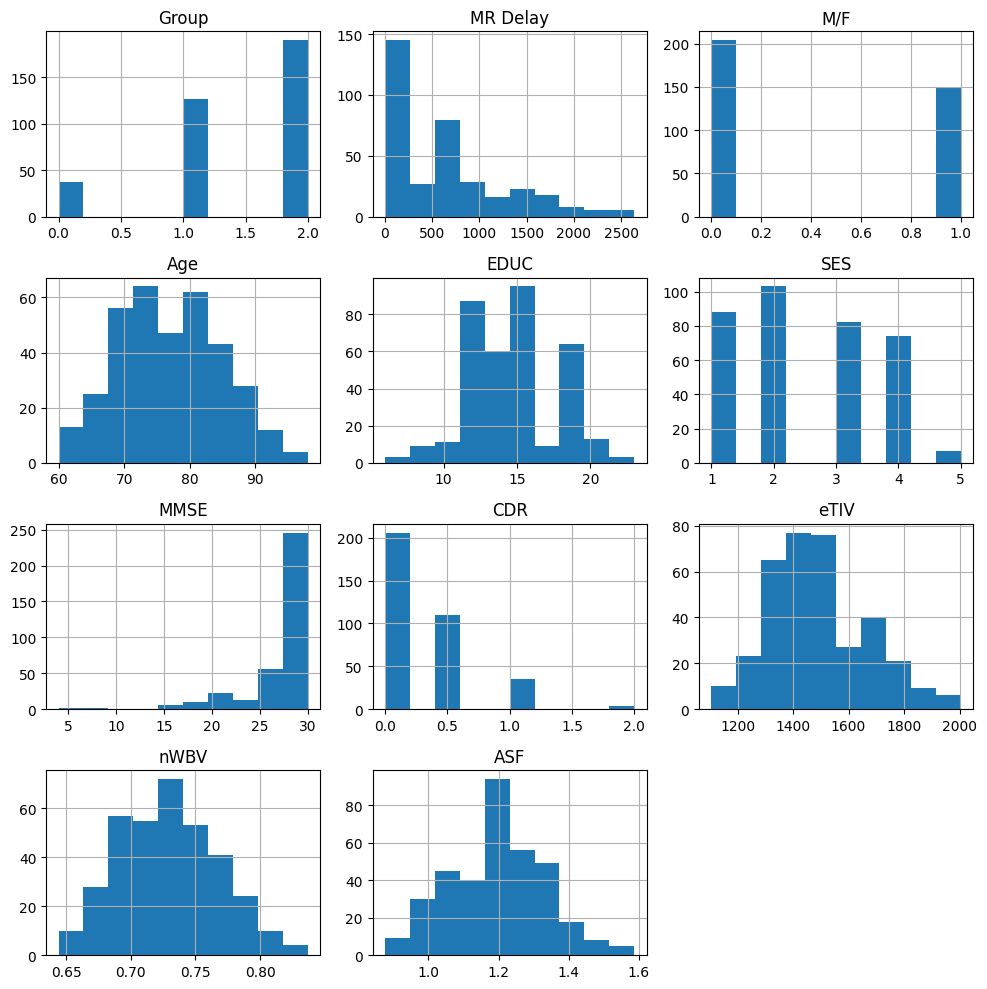

In [12]:
# Plot the distribution of all the variables using a histogram
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

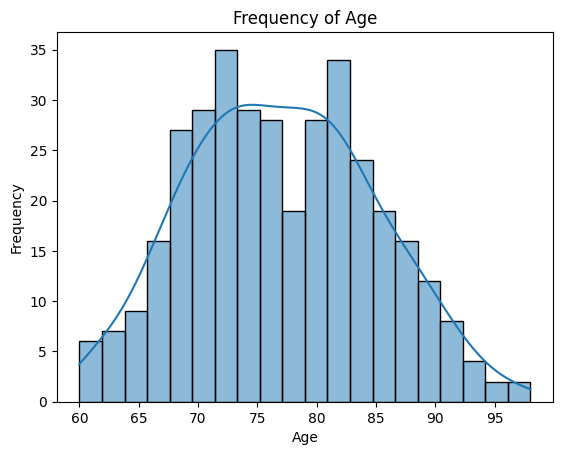

In [13]:
# Visualize the frequency of Age
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Frequency of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

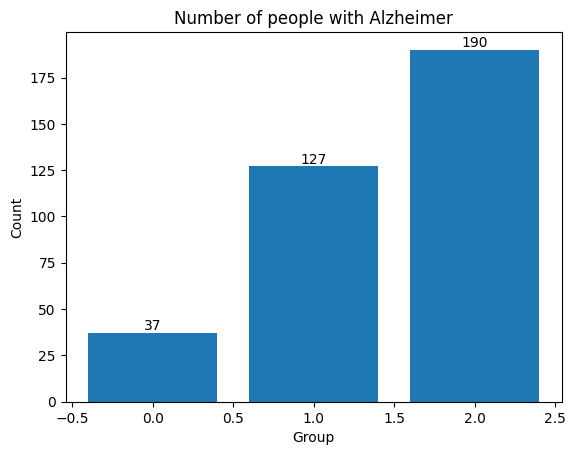

In [60]:
# No. of people having Alzheimer
alzheimer_count = data[data['Group'] != 'NonDemented']['Group'].value_counts()

bars = plt.bar(alzheimer_count.index, alzheimer_count.values)

# Add labels at the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.title('Number of people with Alzheimer')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()


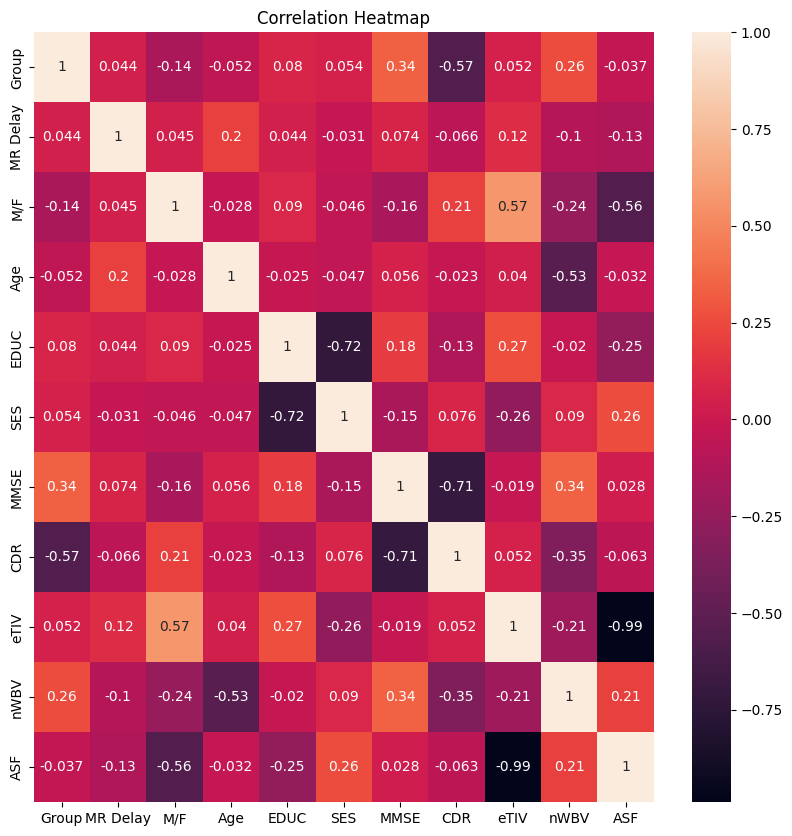

In [15]:
# Calculate the correlation of features and plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

# DATA PREPARATION

In [16]:
# Split into train and test sets
X = scaled_features
Y = target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# MODELS

## One vs Rest (OvR) Classifier

In [17]:
# Define model
ovr_model = OneVsRestClassifier(SVC(kernel='linear', random_state=42))

In [18]:
# Train and evaluate One vs Rest (OvR) Classifier
ovr_model.fit(X_train, Y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear', random_state=42))

In [19]:
# Predict on the test set
Y_pred_ovr = ovr_model.predict(X_test)

In [20]:
# Save the OneVsRest model
joblib.dump(ovr_model, '../Artifacts/OvR_model.pkl')

['../Artifacts/OvR_model.pkl']

In [21]:
# Calculate Accuracy, Precision, Recall, and F1 Score
accuracy_ovr = accuracy_score(Y_test, Y_pred_ovr)
print(f"ACCURACY: {accuracy_ovr:.2f}")

precision_ovr = precision_score(Y_test, Y_pred_ovr, average='weighted')
print(f"PRECISION: {precision_ovr:.2f}")

recall_ovr = recall_score(Y_test, Y_pred_ovr, average='weighted')
print(f"RECALL: {recall_ovr:.2f}")

f1_ovr = f1_score(Y_test, Y_pred_ovr, average='weighted')
print(f"F1 SCORE: {f1_ovr:.2f}")

ACCURACY: 0.89
PRECISION: 0.90
RECALL: 0.89
F1 SCORE: 0.85


In [22]:
# Confusion Matrix
conf_matrix_ovr = confusion_matrix(Y_test, Y_pred_ovr)

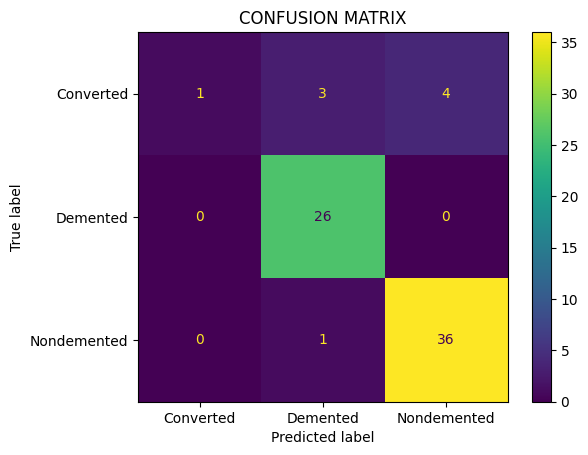

In [23]:
# Plot the confusion matrix
disp_ovr = ConfusionMatrixDisplay(conf_matrix_ovr,display_labels=encoder_group.inverse_transform([0, 1, 2]))
disp_ovr.plot(cmap=plt.cm.viridis)
plt.title('CONFUSION MATRIX')
plt.show()

In [24]:
# Get the unique classes in Y_test
unique_classes = np.unique(Y_test)
n_classes = len(unique_classes)

In [25]:
# Binarize the output (One-vs-Rest requires this for ROC AUC)
Y_test_binarized = label_binarize(Y_test, classes=unique_classes)
Y_pred_binarized = label_binarize(Y_pred_ovr, classes=unique_classes)

In [26]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], Y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [27]:
# Print ROC AUC score for each class with label names
print("ROC - AUC scores:")
for i in range(n_classes):
    class_label = encoder_group.inverse_transform([unique_classes[i]])[0]
    print(f'Class {class_label}: AUC = {roc_auc[i]:.2f}')

ROC - AUC scores:
Class Converted: AUC = 0.56
Class Demented: AUC = 0.96
Class Nondemented: AUC = 0.93


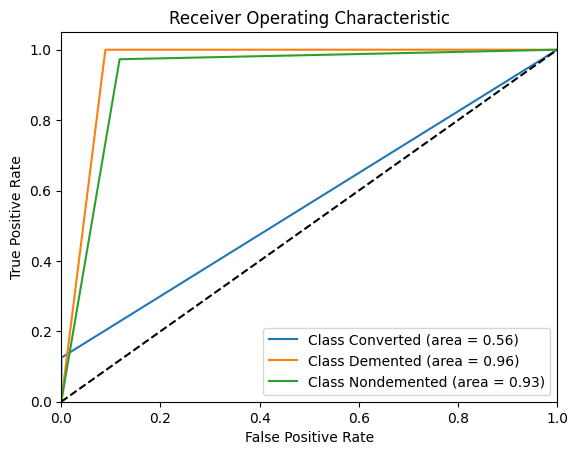

In [28]:
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {encoder_group.inverse_transform([unique_classes[i]])[0]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## One vs One (OvO) Classifier

In [29]:
# Define models
ovo_model = OneVsOneClassifier(SVC(kernel='linear', random_state=42))

In [30]:
# Train and evaluate One vs One (OvO) Classifier
ovo_model.fit(X_train, Y_train)

OneVsOneClassifier(estimator=SVC(kernel='linear', random_state=42))

In [31]:
# Predict on the test set
Y_pred_ovo = ovo_model.predict(X_test)

In [32]:
# Save the OneVsOne model
joblib.dump(ovo_model, '../Artifacts/OvO_model.pkl')

['../Artifacts/OvO_model.pkl']

In [33]:
# Calculate Accuracy, Precision, Recall, and F1 Score
accuracy_ovo = accuracy_score(Y_test, Y_pred_ovo)
print(f"ACCURACY: {accuracy_ovo:.2f}")

precision_ovo = precision_score(Y_test, Y_pred_ovo, average='weighted')
print(f"PRECISION: {precision_ovo:.2f}")

recall_ovo = recall_score(Y_test, Y_pred_ovo, average='weighted')
print(f"RECALL: {recall_ovo:.2f}")

f1_ovo = f1_score(Y_test, Y_pred_ovo, average='weighted')
print(f"F1 SCORE: {f1_ovo:.2f}")

ACCURACY: 0.87
PRECISION: 0.86
RECALL: 0.87
F1 SCORE: 0.87


In [34]:
# Confusion Matrix
conf_matrix_ovo = confusion_matrix(Y_test, Y_pred_ovo)

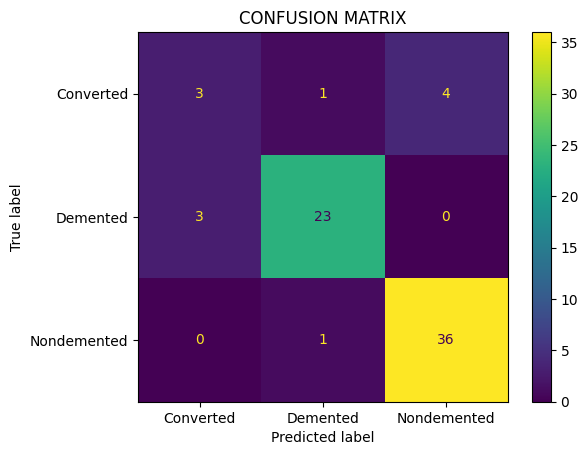

In [35]:
# Plot the confusion matrix
disp_ovr = ConfusionMatrixDisplay(conf_matrix_ovo,display_labels=encoder_group.inverse_transform([0, 1, 2]))
disp_ovr.plot(cmap=plt.cm.viridis)
plt.title('CONFUSION MATRIX')
plt.show()

In [36]:
# Get the unique classes in Y_test
unique_classes = np.unique(Y_test)
n_classes = len(unique_classes)

In [37]:
# Binarize the output (One-vs-Rest requires this for ROC AUC)
Y_test_binarized = label_binarize(Y_test, classes=unique_classes)
Y_pred_binarized = label_binarize(Y_pred_ovo, classes=unique_classes)

In [38]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], Y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [39]:
# Print ROC AUC score for each class with label names
print("ROC - AUC scores:")
for i in range(n_classes):
    class_label = encoder_group.inverse_transform([unique_classes[i]])[0]
    print(f'Class {class_label}: AUC = {roc_auc[i]:.2f}')

ROC - AUC scores:
Class Converted: AUC = 0.66
Class Demented: AUC = 0.92
Class Nondemented: AUC = 0.93


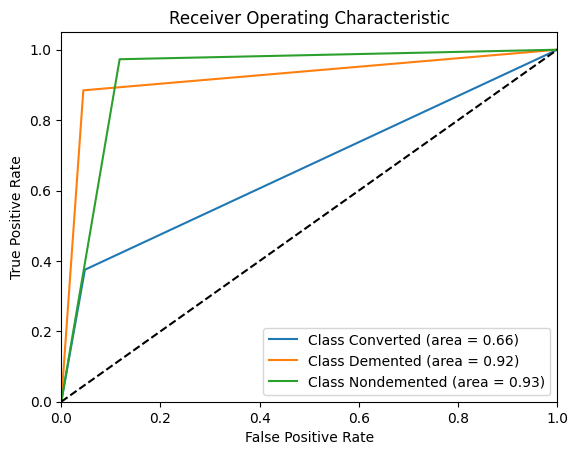

In [40]:
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {encoder_group.inverse_transform([unique_classes[i]])[0]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## SVM

In [41]:
# Define models
svm_model = SVC(kernel='linear', random_state=42)

In [42]:
# Train and evaluate SVM Model
svm_model.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [43]:
# Find the support vectors for the SVM model
support_vectors = svm_model.support_vectors_
print(f"Number of support vectors: {len(support_vectors)}")

Number of support vectors: 106


In [44]:
# Predict on the test set
Y_pred_svm = svm_model.predict(X_test)

In [45]:
# Save the SVM model
joblib.dump(svm_model, '../Artifacts/SVM_model.pkl')

['../Artifacts/SVM_model.pkl']

In [46]:
# Calculate Accuracy, Precision, Recall, and F1 Score
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print(f"ACCURACY: {accuracy_svm:.2f}")

precision_svm = precision_score(Y_test, Y_pred_svm, average='weighted')
print(f"PRECISION: {precision_svm:.2f}")

recall_svm = recall_score(Y_test, Y_pred_svm, average='weighted')
print(f"RECALL: {recall_svm:.2f}")

f1_svm = f1_score(Y_test, Y_pred_svm, average='weighted')
print(f"F1 SCORE: {f1_svm:.2f}")

ACCURACY: 0.87
PRECISION: 0.86
RECALL: 0.87
F1 SCORE: 0.87


In [47]:
# Confusion Matrix
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)

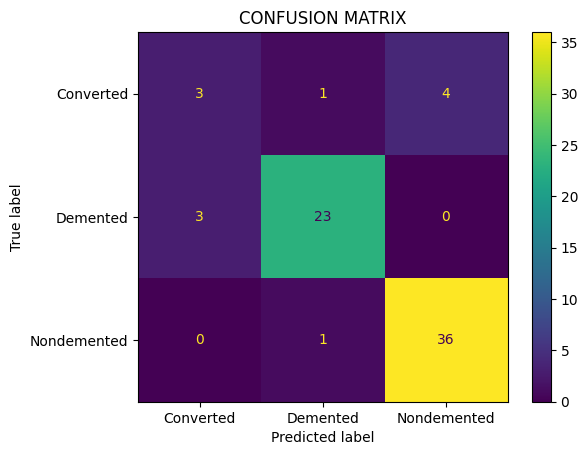

In [48]:
# Plot the confusion matrix
disp_ovr = ConfusionMatrixDisplay(conf_matrix_svm,display_labels=encoder_group.inverse_transform([0, 1, 2]))
disp_ovr.plot(cmap=plt.cm.viridis)
plt.title('CONFUSION MATRIX')
plt.show()

In [49]:
# Get the unique classes in Y_test
unique_classes = np.unique(Y_test)
n_classes = len(unique_classes)

In [50]:
# Binarize the output (One-vs-Rest requires this for ROC AUC)
Y_test_binarized = label_binarize(Y_test, classes=unique_classes)
Y_pred_binarized = label_binarize(Y_pred_svm, classes=unique_classes)

In [51]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], Y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [52]:
# Print ROC AUC score for each class with label names
print("ROC - AUC scores:")
for i in range(n_classes):
    class_label = encoder_group.inverse_transform([unique_classes[i]])[0]
    print(f'Class {class_label}: AUC = {roc_auc[i]:.2f}')

ROC - AUC scores:
Class Converted: AUC = 0.66
Class Demented: AUC = 0.92
Class Nondemented: AUC = 0.93


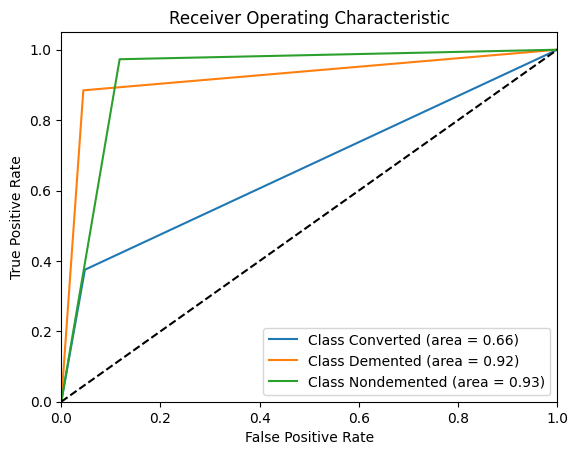

In [53]:
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {encoder_group.inverse_transform([unique_classes[i]])[0]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# SAMPLE PREDICTIONS

In [54]:
# Determine the model with the highest accuracy
accuracies = {
    'One vs Rest': accuracy_ovr,
    'One vs One': accuracy_ovo,
    'SVM': accuracy_svm
}

In [55]:
# Find the best model based on accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]
print(f"Best model based on accuracy: {best_model_name} with accuracy {best_accuracy:.2f}")

Best model based on accuracy: One vs Rest with accuracy 0.89


In [56]:
# Choose the best model
if best_model_name == 'One vs Rest':
    best_model = ovr_model
elif best_model_name == 'One vs One':
    best_model = ovo_model
else:
    best_model = svm_model

In [57]:
# Sample prediction on a few random test instances
num_samples = 5
random_indices = random.sample(range(len(X_test)), num_samples)

X_sample = X_test.iloc[random_indices] if hasattr(X_test, 'iloc') else X_test[random_indices]
Y_sample_actual = Y_test.iloc[random_indices]
Y_sample_pred = best_model.predict(X_sample)

In [58]:
# Map the indices to the original data to retrieve the columns
original_indices = Y_test.index[random_indices]
# Use .loc to access the rows with the original indices
original_data_sample = data.loc[original_indices]

In [59]:
# Display the results
for i in range(num_samples):
    print(f"Sample {i+1}:")
    print("  Data:")
    print(original_data_sample.iloc[i])
    print(f"  Actual Label: {encoder_group.inverse_transform([Y_sample_actual.iloc[i]])[0]}")
    print(f"  Predicted Label: {encoder_group.inverse_transform([Y_sample_pred[i]])[0]}")
    print()

Sample 1:
  Data:
Group          2.000
MR Delay     538.000
M/F            0.000
Age           90.000
EDUC          18.000
SES            3.000
MMSE          27.000
CDR            0.000
eTIV        1200.000
nWBV           0.718
ASF            1.462
Name: 6, dtype: float64
  Actual Label: Nondemented
  Predicted Label: Nondemented

Sample 2:
  Data:
Group          2.000
MR Delay       0.000
M/F            1.000
Age           69.000
EDUC          16.000
SES            2.000
MMSE          28.000
CDR            0.000
eTIV        1848.000
nWBV           0.737
ASF            0.950
Name: 166, dtype: float64
  Actual Label: Nondemented
  Predicted Label: Nondemented

Sample 3:
  Data:
Group          2.000
MR Delay       0.000
M/F            0.000
Age           70.000
EDUC          17.000
SES            3.000
MMSE          29.000
CDR            0.000
eTIV        1640.000
nWBV           0.766
ASF            1.070
Name: 84, dtype: float64
  Actual Label: Nondemented
  Predicted Label: Nondemented